## Model Improvement

Based on the additional EDA (Genre Clustering Analysis) performed on the most incorrectly predicted genres, a subset of the original predictor variables were identified as most important in differentitating between songs of different genres. These variables were then given to the model to train on, and all other predictor variables were dropped.

The unique predictor variables:
1. Instrumentalness
2. Liveness
3. Tempo
4. Energy
5. Loudness
6. Speechiness
7. Duration_s

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Create a dataframe from the dataset

In [16]:
songdata = pd.read_csv('data/genre_music_cleaned.csv')

In [17]:
print("Shape: ", songdata.shape)

Shape:  (35853, 20)


### Model Data Preparation

MLPClassifier predicts classes that inputs fall into, and therefore we need to classify the genre values and label encode them.

In [18]:
from sklearn.preprocessing import LabelEncoder

# label encoding genre
songdata['genre'] = LabelEncoder().fit_transform(songdata['genre'])
songdata.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,0
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,2
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,2
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,2
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,3


We now need to scale the predictor variables so that they can be used together to predict the genres. Dropping of less important variables is done here too.

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections', 'duration_s']] = MinMaxScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections', 'duration_s']])

songdata.drop(columns=['popularity', 'track', 'artist', 'decade', 'time_signature', 'sections', 'acousticness', 'valence', 'mode', 'chorus_hit'], inplace=True)
songdata.describe()

,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,tempo,duration_s,genre
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000
mean,0.542633,0.575719,5.202605,0.734070,0.076686,0.161579,0.192288,0.494928,0.052834,2.757315
std,0.181162,0.254555,3.533002,0.101216,0.091585,0.309249,0.176256,0.120988,0.029627,1.301303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420040,0.389847,2.000000,0.684963,0.035208,0.000000,0.082353,0.403620,0.037424,2.000000
50%,0.554656,0.595899,5.000000,0.752495,0.045417,0.000145,0.120690,0.487123,0.048506,2.000000
75%,0.675101,0.784946,8.000000,0.806989,0.073229,0.080800,0.253550,0.566713,0.060570,3.000000
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [20]:
songdata['genre'].value_counts()

2    14329
3     9455
5     6190
1     2469
4     2104
0     1306
Name: genre, dtype: int64

We note that the numbers of each songs per category are different. For example, there are 14247 songs in the Pop genre, whereas there are only 1326 songs in the EDM genre. Although using a Train/Test model would help to obtain random sampling of data, as there is a huge difference in sample size between song categories, we run the risk of introducing a significant sampling bias. 

Hence, we use Stratified Sampling Technique, which would help to eliminate the biasness of the selection of data.

Source: https://medium.com/@IrekponorVictor/creating-an-unbiased-test-set-for-your-model-using-stratified-sampling-technique-672b778022d5

In [21]:
# importing StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train = x_train.drop(columns=['genre'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test = x_test.drop(columns=['genre'])

Check how many songs in each genre there are in train/test set

In [22]:
y_train.value_counts

<bound method DataFrame.value_counts of        genre
8802       2
31959      2
7120       3
26130      2
15543      3
...      ...
23922      3
19013      3
10324      2
7639       2
577        2

[28682 rows x 1 columns]>

In [23]:
print(len(y_train))
print((int)(np.ceil(10**6 / len(y_train))))

28682
35


In [24]:
y_test.value_counts()

genre
2        2866
3        1891
5        1238
1         494
4         421
0         261
dtype: int64

After obtaining Train/Test data, use MLPClassifier

Try plotting the correlation matrix.

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(400, 300, 250, 100, 50), max_iter=3000,
                           activation = 'relu', solver='sgd', learning_rate='adaptive', learning_rate_init=0.0001,
                           momentum=0.9, batch_size=6, random_state=1)

classifier.fit(x_train, y_train.values.ravel())
y_pred = classifier.predict(x_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

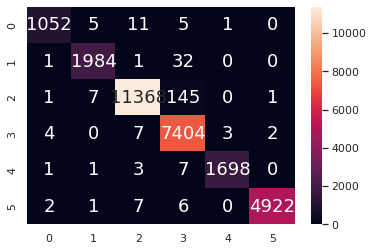

In [ ]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Check the accuracy on the test data.

In [ ]:
y_test_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Accuracy of MLPClassifier on test data : 0.988843954818017


<AxesSubplot:>

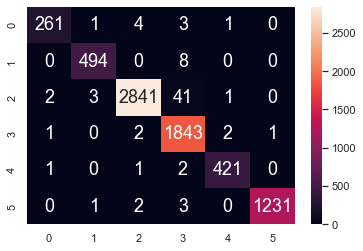

In [ ]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

With the refined predictor variables, the model has improved in its prediction accuracy, with 99% accuracy on the train and 98% accuracy on the test set.

Save model with pickle

In [ ]:
import pickle

filename = "models/final_model.sav"
pickle.dump(classifier, open(filename, 'wb'))

In order to test the ability of the model to predict the genres of song samples beyond the training dataset, an extra dataset of additional song samples was given to the model. (Source: https://kaggle.com/mrmorj/dataset-of-songs-in-spotify?select=genres_v2.csv)

Verification with new dataset

In this new dataset, there are only 3 different genres of songs, Pop, R&B and Rap, so we encoded them to match the encoding used on the original dataset. (Pop = 2, R&B = 3, Rap = 4)

In [ ]:
validationdata = pd.read_csv('data/genres_v2.csv', low_memory=False)
validationdata.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature', 'Unnamed: 0', 'title', 'acousticness', 'valence', 'mode'], inplace=True)
validationdata = validationdata.loc[validationdata['genre'].isin(['Pop', 'RnB', 'Rap'])]
validationdata.drop_duplicates(subset=['song_name'], keep='first')

for index_label, row_series in validationdata.iterrows():
    if validationdata.at[index_label , 'genre'] == 'Pop':
        validationdata.at[index_label , 'genre'] = 2
    elif validationdata.at[index_label , 'genre'] == 'RnB':
        validationdata.at[index_label , 'genre'] = 3
    elif validationdata.at[index_label , 'genre'] == 'Rap':
        validationdata.at[index_label , 'genre'] = 4

validationdata['genre'] = pd.to_numeric(validationdata['genre'])
validationdata.head(50000)

,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,tempo,duration_ms,genre,song_name
14089,0.745,0.561,0,-4.869,0.0807,0.000000,0.133,77.557,248431,4,Empty
14090,0.837,0.364,8,-11.713,0.2760,0.000000,0.271,123.984,213594,4,MIDDLE CHILD
14091,0.834,0.730,8,-3.714,0.2220,0.000000,0.124,155.008,312820,4,SICKO MODE
14092,0.598,0.427,7,-8.764,0.0317,0.000006,0.210,76.469,175721,4,HIGHEST IN THE ROOM
14093,0.763,0.628,11,-5.850,0.0500,0.000000,0.114,140.958,190557,4,BUTTERFLY EFFECT
...,...,...,...,...,...,...,...,...,...,...,...
18492,0.486,0.617,5,-7.115,0.0287,0.000003,0.109,138.015,242373,2,Viva La Vida
18493,0.572,0.385,7,-6.362,0.0308,0.000000,0.231,191.598,215733,2,Shallow
18494,0.781,0.445,2,-6.061,0.0295,0.000000,0.184,157.996,281560,2,Thinking out Loud
18495,0.620,0.574,5,-7.788,0.0479,0.000000,0.190,200.046,250173,2,1-800-273-8255


Accuracy of MLPClassifier on test data : 0.4147005444646098


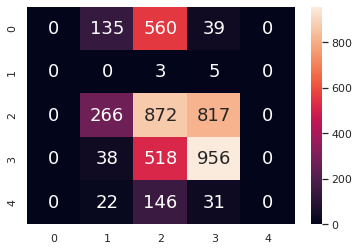

In [ ]:
## converting duration_ms to duration_s as duration_s was used in original dataset
validationdata["duration_ms"] = validationdata["duration_ms"]/1000
validationdata.rename(columns={"duration_ms":"duration_s"},inplace=True)

validationdata[['danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'speechiness', 'duration_s']] = MinMaxScaler().fit_transform(validationdata[['danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'speechiness', 'duration_s']])
validationdata.drop(columns=['song_name'], inplace=True)

response = pd.DataFrame(validationdata['genre'])
predictor = validationdata
predictor = validationdata.drop(columns=['genre'])

validation_pred = classifier.predict(predictor)
cm = confusion_matrix(validation_pred, response)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

The accuracy of the model on this test set was 41%, which is reasonable. However, there is still much room for improvement, and perhaps training the model on an even larger dataset with more song samples would yield a better prediction accuracy. There may also be even more music characteristics which can be used as predictor variables which are not present in the dataset.